<a href="https://colab.research.google.com/github/subho99/Computational-Data-Science/blob/main/SubhajitBasistha_M6_NB_Case_Study_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Case Study: Customer Churn Analysis

## Learning Objectives

At the end of the experiment, you will be able to

* understand what is customer churn
* know the importance of predicting customer churn
* build a prediction model for a credit card company dataset
* build a prediction model for a telecommunication company dataset

## Information

Customer churn or customer attrition is the phenomenon where customers of a business no longer purchase or interact with the business. A high churn means that a higher number of customers no longer want to purchase goods and services from the business. Customer churn rate or customer attrition rate is the mathematical calculation of the percentage of customers who are not likely to make another purchase from a business.

Customer churn happens when customers decide to not continue purchasing products/services from an organization and end their association. It is an integral parameter for the organization since acquiring a new customer could cost even more than retaining an existing customer. Customer churn can prove to be a roadblock for an exponentially growing organization and a retention strategy should be decided in order to avoid an increase in customer churn rates.

To know more about customer churn, click [here](https://www.questionpro.com/blog/customer-churn/).

### Importance of Predicting Customer Churn

The ability to predict that certain customers are at a very high risk of churning represents a substantial revenue maintenance source for any business:

* Acquiring new customers is a costly affair but losing the existing customers will cost even more for the business or the organization. The existing customer base should be happy to purchase repeatedly from your brand, for the best business outcomes

* Increasing market competition encourages organizations to focus not only on new business but also on retaining existing customers.

* The most important step towards predicting customer churn is to start awarding existing customers for regular purchases and support.

* Customer churn usually results from an entire customer journey and not just a few incidents. To avoid customer churn, organizations should start offering incentives on purchases of these soon-to-churn customers.

* A customer’s intention to stop using a particular product/service may always be a decision formed over time. There are various factors which lead to this decision and it is important for organizations to understand each and every factor so that customers can be convinced to stay and keep making purchases.

### Customer Churn Analysis

Here we will go through some consumer data and see how we can leverage data insights and predictive modeling in order to improve customer retention.

**Dataset Description**

Our first customer dataset is from a **credit card company**, where we are able to review customer attributes such as gender, age, tenure, balance, number of products they are subscribed to, their estimated salary and if they stopped the subscription or not.

Here, tenure represents the number of months the customer has stayed with the company.

In [1]:
#@title Run this cell to download the datasets
from IPython import get_ipython

ipython = get_ipython()

notebook= "M6_AST_10_Customer_Churn_Analysis_C" #name of the notebook

ipython.magic("sx wget https://raw.githubusercontent.com/anilak1978/customer_churn/master/Churn_Modeling.csv")
ipython.magic("sx wget https://raw.githubusercontent.com/anilak1978/customer-churn/master/bigml_59c28831336c6604c800002a.csv")



['--2023-09-24 11:55:21--  https://raw.githubusercontent.com/anilak1978/customer-churn/master/bigml_59c28831336c6604c800002a.csv',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 310007 (303K) [text/plain]',
 'Saving to: ‘bigml_59c28831336c6604c800002a.csv’',
 '',
 '',
 '          bigml_59c   0%[                    ]       0  --.-KB/s               ',
 'bigml_59c28831336c6 100%[===================>] 302.74K  --.-KB/s    in 0.04s   ',
 '',
 '2023-09-24 11:55:22 (6.73 MB/s) - ‘bigml_59c28831336c6604c800002a.csv’ saved [310007/310007]',
 '']

### Import required packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, f1_score

In [3]:
# Read data
df = pd.read_csv("Churn_Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Shape of dataset
df.shape

(10000, 14)

In [5]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# Looking at the summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From the above statistical insights, we see that the average age of our customers is 39, the average month customer has been a member is 5 and the estimated average salary is 100K.

In [8]:
# Columns of dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

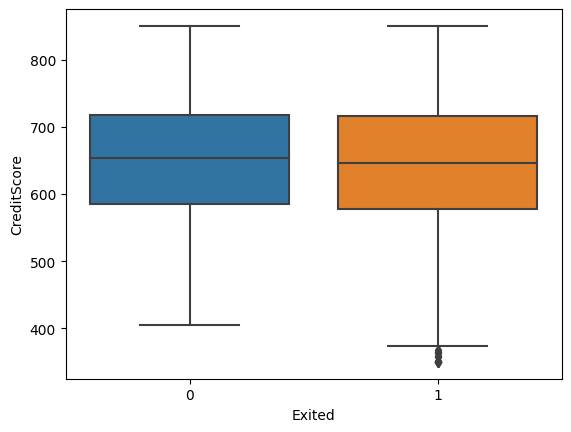

In [9]:
# Looking at CreditScore for Churn and No churn data
sns.boxplot(x=df['Exited'], y=df['CreditScore'])
plt.show()

In [10]:
# Mean CreditScore for Churn and No churn data
df.groupby('Exited')['CreditScore'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

From the above results, we can see the difference between the credit score for churn and no churn customers.

<ipython-input-11-1e5e15a520d4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Geography', y='Exited', data = df, ci=None)


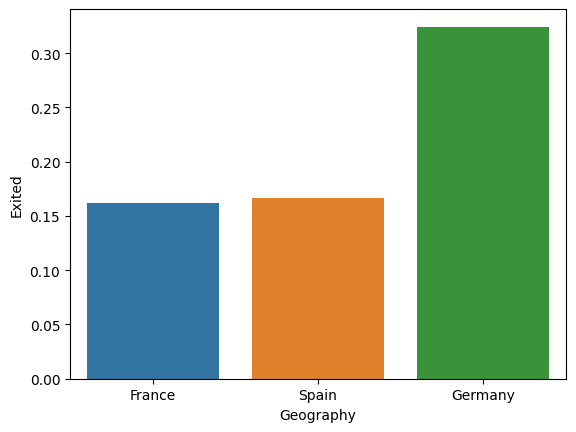

In [11]:
# Visualize Geography and Churn columns
sns.barplot(x='Geography', y='Exited', data = df, ci=None)
plt.show()

The churn rate is higher for Germany than France and Spain.

<ipython-input-12-2e5cebfd169b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Exited', data = df, ci=None)


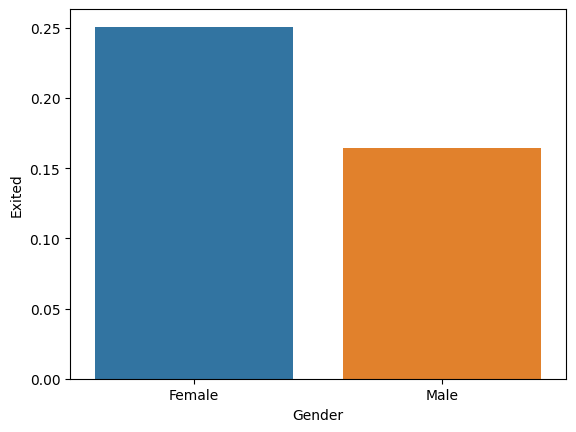

In [12]:
# Visualize Gender and Churn columns
sns.barplot(x='Gender', y='Exited', data = df, ci=None)
plt.show()

The churn rate is higher for female customers.

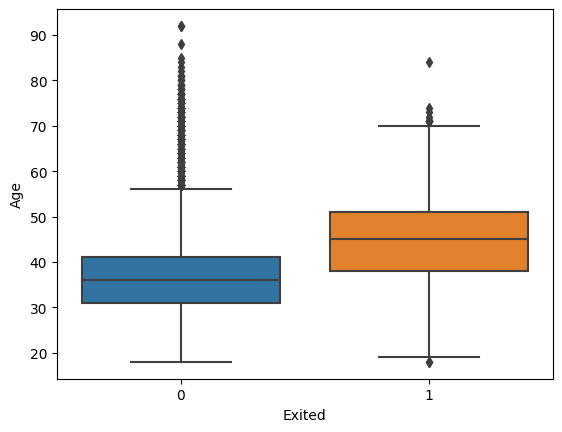

In [13]:
# Looking at Age of Churn and No churn data
sns.boxplot(x=df['Exited'], y=df['Age'])
plt.show()

We can see a significant difference between the age of churn and no churn customers.

<ipython-input-14-14348b095e74>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tenure', y='Exited', data = df, ci=None)


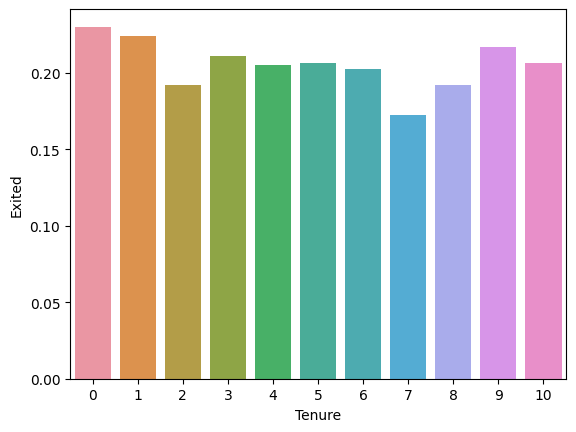

In [14]:
# Visualize Tenure and Churn columns
sns.barplot(x='Tenure', y='Exited', data = df, ci=None)
plt.show()

From the above plot, we can see that 0 and 1 are the top two tenures with the highest churn rate.

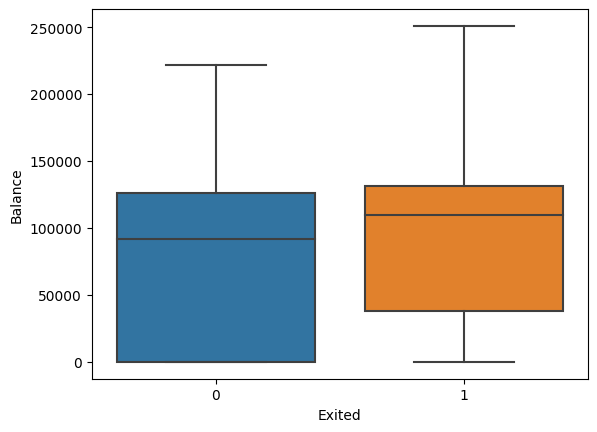

In [15]:
# Looking at Balance for Churn and No churn data
sns.boxplot(x=df['Exited'], y=df['Balance'])
plt.show()

<ipython-input-16-45fb1bc3e2ff>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NumOfProducts', y='Exited', data = df, ci=None)


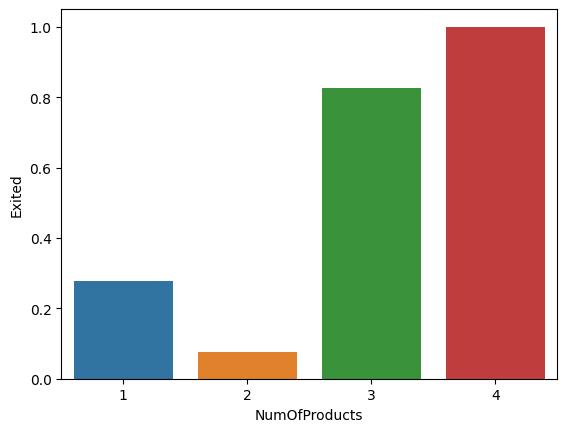

In [16]:
# Visualize Number of Products and Churn columns
sns.barplot(x='NumOfProducts', y='Exited', data = df, ci=None)
plt.show()

<ipython-input-17-fbdc2f0838b1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='HasCrCard', y='Exited', data = df, ci=None)


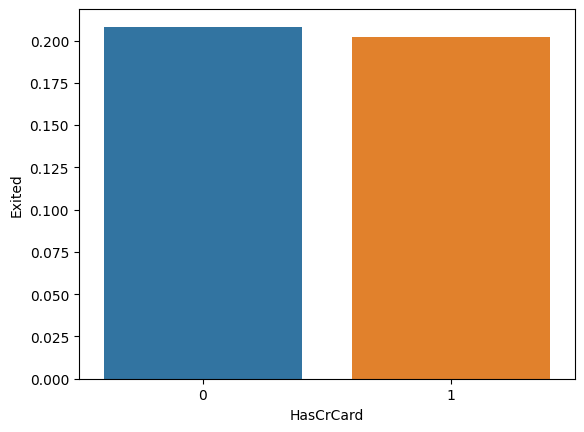

In [17]:
# Visualize Has credit card and Churn columns
sns.barplot(x='HasCrCard', y='Exited', data = df, ci=None)
plt.show()

In the above plot, a very less difference is there in churn rate between the customers who have credit card and who doesn't.

<ipython-input-18-e9eaa5ef6f51>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='IsActiveMember', y='Exited', data = df, ci=None)


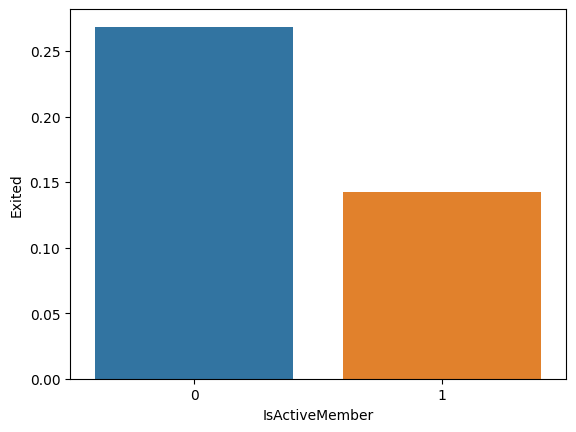

In [18]:
# Visualize Is active member and Churn columns
sns.barplot(x='IsActiveMember', y='Exited', data = df, ci=None)
plt.show()

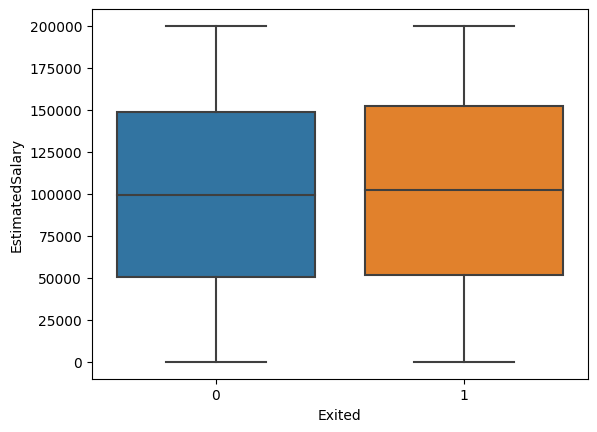

In [19]:
# Looking at EstimatedSalary for Churn and No churn data
sns.boxplot(x=df['Exited'], y=df['EstimatedSalary'])
plt.show()

<Figure size 2000x2000 with 0 Axes>

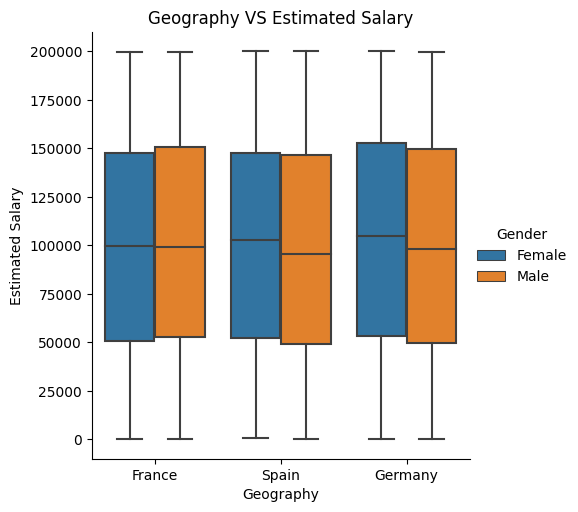

In [20]:
# Looking at Geography and Gender Distribution against Estimated Salary
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Gender", kind="box", data=df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")
plt.show()

When we look at the gender and geographic distribution of estimated salary, we see that male customers estimated average salary is little more as compared to that of females in France, however in Germany and Spain female customers’ estimated average salary is higher.

Based on our basic exploratory analysis, we can define the important customer attributes that can give us the best insight in order to predict the type of customers that can churn.

In this dataset, we can select credit score, geography, gender, age, tenure, balance, number of products, is active member and estimated salary attributes as the feature set and exited as the target variable.

In [21]:
# Feature set
X = df[["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "IsActiveMember", "EstimatedSalary"]].values
# Target
y = df[["Exited"]]
X[0:5], y[0:5]

(array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 101348.88],
        [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 1, 112542.58],
        [502, 'France', 'Female', 42, 8, 159660.8, 3, 0, 113931.57],
        [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 93826.63],
        [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 79084.1]],
       dtype=object),
    Exited
 0       1
 1       0
 2       1
 3       0
 4       0)

Update the categorical variables to numerical variables:

In [22]:
# preprocessing categorical variables
geography = LabelEncoder()
geography.fit(["France", "Spain", "Germany"])
X[:,1] = geography.transform(X[:,1])

gender = LabelEncoder()
gender.fit(["Female", "Male"])
X[:,2] = gender.transform(X[:,2])
X[0:5]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 101348.88],
       [608, 2, 0, 41, 1, 83807.86, 1, 1, 112542.58],
       [502, 0, 0, 42, 8, 159660.8, 3, 0, 113931.57],
       [699, 0, 0, 39, 1, 0.0, 2, 0, 93826.63],
       [850, 2, 0, 43, 2, 125510.82, 1, 1, 79084.1]], dtype=object)

Splitting into training and testing set:

In [23]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In this dataset, let’s use DecisionTreeClassifier and RandomForestClassifier to create the model and prediction, further evaluate them both to see which one is better.

In [24]:
# Create model using DecisionTree Classifier and fit training data
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Prediction
dt_pred = dt_model.predict(X_test)
dt_pred[0:5]

array([1, 0, 1, 0, 0])

In [25]:
# Evaluating the prediction model
accuracy_score(y_test, dt_pred)

0.792

In [26]:
# Create Random Forest Decision Tree model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train.values.ravel())

# Prediction using rf_model
rf_pred = rf_model.predict(X_test)
rf_pred[0:5]

array([0, 0, 1, 0, 0])

In [27]:
# Evaluate the model
accuracy_score(y_test, rf_pred)

0.8535

Based on the metrics evaluations, while 79% of the predictions would be accurate with the Decision Classifier Model, 85% of the predictions would be accurate with the RandomForestClassifier. In this case Random Forest is performing better.

Now, let’s look at the second customer dataset to see if we can do better analysis and prediction models.

**Dataset Description**

Here we are looking at a **telecommunication company** and its existing customer attributes such as their current plan, charges, location in terms of state, amount of customer service calls, account length and churn.

In [28]:
# Read data
df1 = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df1.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [29]:
# Shape of dataset
df1.shape

(3333, 21)

In [30]:
# Check for missing values
df1.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [31]:
# Datatypes
df1.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

There are no missing data within the dataset and data types are correct.

<ipython-input-32-eba8d32f9f4a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='churn', data = df1, ci=None)


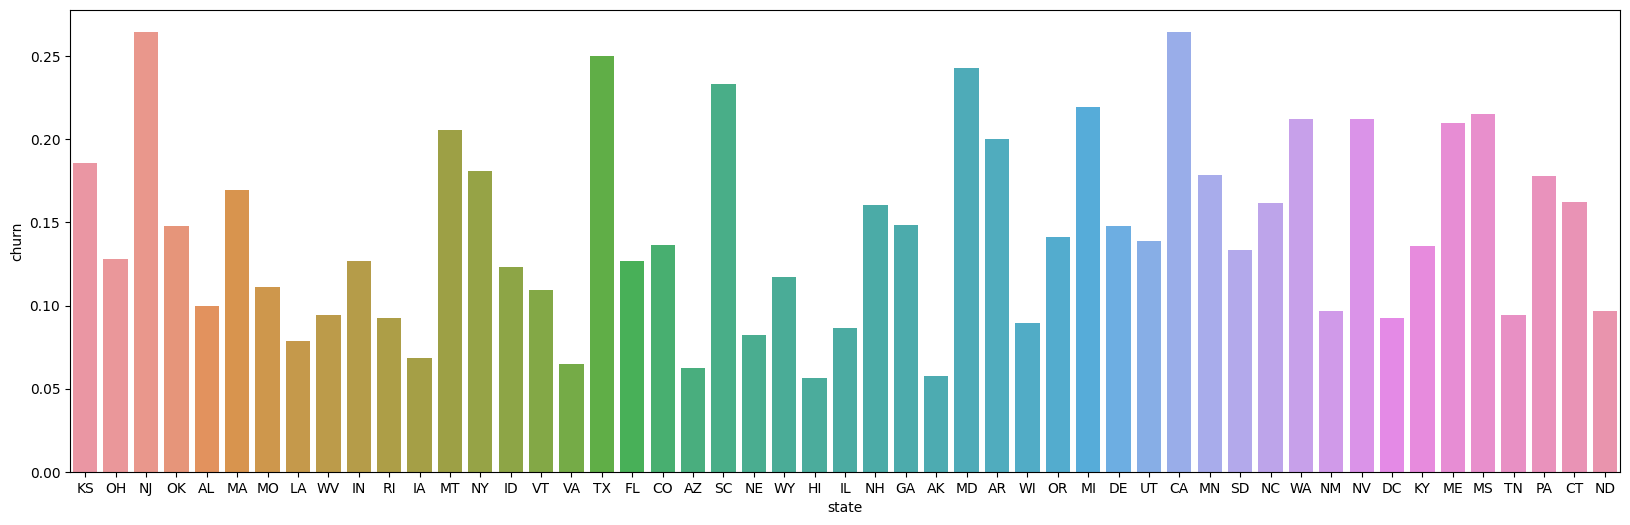

In [32]:
# Visualize State and Churn columns
plt.figure(figsize=(20,6))
sns.barplot(x='state', y='churn', data = df1, ci=None)
plt.show()

When we look at the state and churn we see that California and New Jersey are the top two states with the highest churn rate.

<ipython-input-33-2aa996627d2d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='international plan', y='churn', data = df1, ci=None)


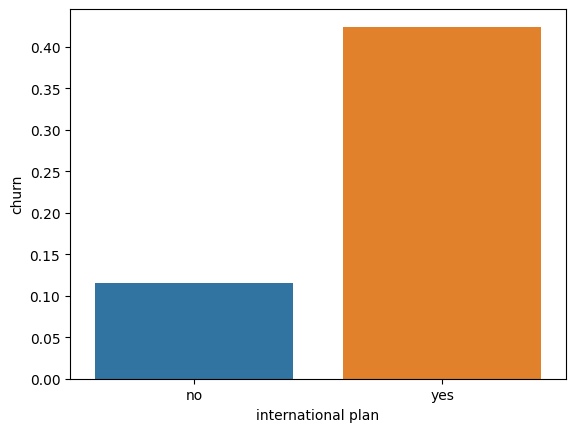

In [33]:
# Visualize International plan and Churn columns
sns.barplot(x='international plan', y='churn', data = df1, ci=None)
plt.show()

<ipython-input-34-3b7604a82a14>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='voice mail plan', y='churn', data = df1, ci=None)


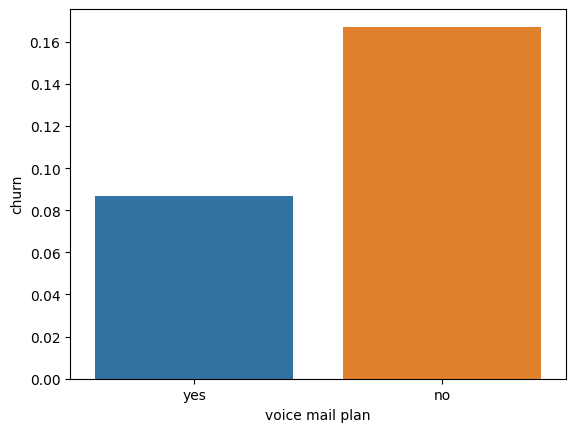

In [34]:
# Visualize Voice mail plan and Churn columns
sns.barplot(x='voice mail plan', y='churn', data = df1, ci=None)
plt.show()

We also see that the churn rate is higher with the international plan customers and lower with the customers that have voice mail plan.

One possible reason for customers on the International plan having a significantly higher churn is that they are joining whenever they have to travel abroad for a short period of time and when the trip gets over, they leave.

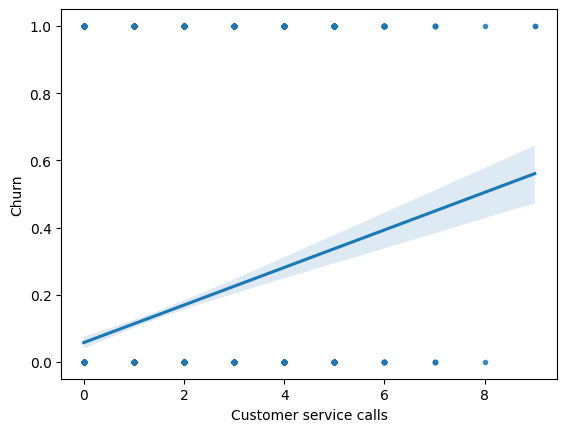

In [35]:
# Relationship between Customer service calls and Churn columns
sns.regplot(x=df1['customer service calls'], y=df1['churn'], marker='.')
plt.xlabel('Customer service calls')
plt.ylabel("Churn")
plt.show()

Poor customer service is one of the well-known reasons for customer churn. In this case, we can see from the above plot a strong positive linear relationship with the customer service call amount and churn rate.

Now, let’s develop multiple different models and evaluate them to see which one would be the best fit to solve the business problem of customer churn.

In [36]:
# Feature selection
X1 = df1[["account length", "international plan", "total day charge", "total night charge", "total intl charge", "customer service calls", "state"]]
# Target selection
y1 = df1["churn"]
X1[0:5]

,account length,international plan,total day charge,total night charge,total intl charge,customer service calls,state
0,128,no,45.07,11.01,2.70,1,KS
1,107,no,27.47,11.45,3.70,1,OH
2,137,no,41.38,7.32,3.29,0,NJ
3,84,yes,50.90,8.86,1.78,2,OH
4,75,yes,28.34,8.41,2.73,3,OK


Update the categorical variables to numeric variables in order to create model:

In [37]:
# Update state with one hot coding
X1 = pd.get_dummies(X1, columns=["state"])
X1 = X1.values

# Preprocess to update str variables to numerical variables
international_plan = LabelEncoder()
international_plan.fit(["no", "yes"])
X1[:,1] = international_plan.transform(X1[:,1])
X1[0:5]

array([[128, 0, 45.07, 11.01, 2.7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [107, 0, 27.47, 11.45, 3.7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [137, 0, 41.38, 7.32, 3.29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [84, 1, 50.9, 8.86, 1.78, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [75, 1, 28.34, 8.41, 2.73, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 

In [38]:
# Scaling data
sc = StandardScaler()
X1_scaled = sc.fit_transform(X1)

Splitting into training and testing set:

In [39]:
# Create training and testing set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_scaled, y1, test_size=0.2, stratify=y1, random_state=3)

Let’s create a model using the Support Vector Machine.

In [40]:
# Creating the svm model and fitting training set
svc_model = SVC(probability=True)
svc_model.fit(X_train1, y_train1)
# Prediction
svc_pred = svc_model.predict(X_test1)
print(svc_pred[0:5])

# Accuracy score
print("Accuracy score: ", accuracy_score(y_test1, svc_pred))

[False False False False False]
Accuracy score:  0.856071964017991


The accuracy score for SVM Model for predicting churn of the telecommunication company customers is 0.85. However, we should analyze this further as the data is impartial.

We can review additional evaluation metrics, such as cross validation matrix which will give us the number of true positives, false positives, true and false negatives, precision, recall and f1 score.

In [41]:
# Confusion matrix
confusion_matrix(y_test1, svc_pred)

array([[564,   6],
       [ 90,   7]])

The model predicts 564 True Negatives, 6 False Positives, 90 False Negatives, 7 True Positives.

In [42]:
# Precision score for svm
print("Precision: ", precision_score(y_test1, svc_pred))

Precision:  0.5384615384615384


In [43]:
# Recall score for svm
print("Recall: ", recall_score(y_test1, svc_pred))

Recall:  0.07216494845360824


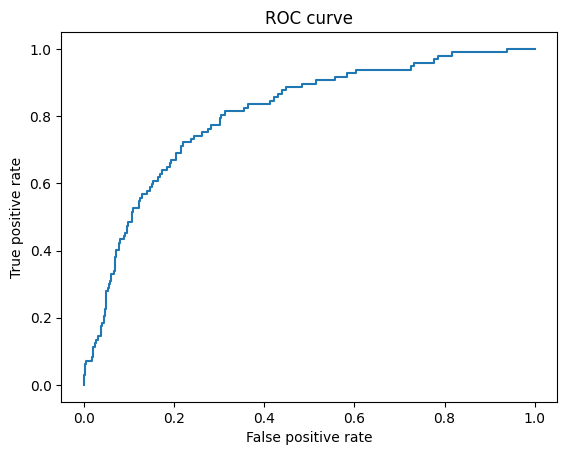

In [44]:
# Probability for each prediction
prob_2 = svc_model.predict_proba(X_test1)[:,1]

# ROC curve giving the false and true positive predictions
fpr, tpr, thresholds = roc_curve(y_test1, prob_2)
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [45]:
# Area under the curve
auc = roc_auc_score(y_test1, prob_2)
print("Area under curve: ", auc)

Area under curve:  0.8060047024778442


In [46]:
# F1_score
f1_ = f1_score(y_test1, svc_pred)
print("F1-score: ", f1_)

F1-score:  0.12727272727272726


Let’s create another model using RandomForestClassifier.

In [47]:
# Create model using RandomForestClassifier and fit the training set
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=4)
rf_model1.fit(X_train1, y_train1)

# Create prediction
rf_pred1 = rf_model1.predict(X_test1)
rf_pred1[0:5]

array([False, False, False, False, False])

In [48]:
# Accuracy score
accuracy_score(y_test1, rf_pred1)

0.904047976011994

We can see that the accuracy score for Random Forest Classification is higher than Support Vector Machine.

In [49]:
# Confusion matrix to find precision and recall
confusion_matrix(y_test1, rf_pred1)

array([[558,  12],
       [ 52,  45]])

The model predicts 558 True Negatives, 12 False Positives, 52 False Negatives, 45 True Positives.

Even though the False Positive count slightly went up, the True Positives are significantly more compared to SVM model.

In [50]:
# Precision score
print("Precision: ", precision_score(y_test1, rf_pred1))

Precision:  0.7894736842105263


In [51]:
# Recall score
print("Recall: ", recall_score(y_test1, rf_pred1))

Recall:  0.4639175257731959


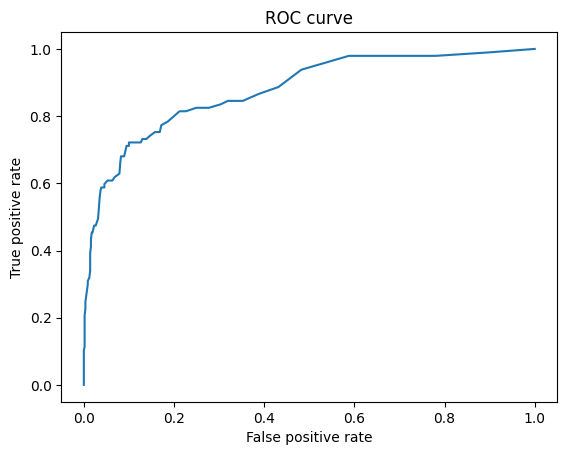

In [52]:
# Probability for each prediction
prob = rf_model1.predict_proba(X_test1)[:,1]

# ROC curve giving the false and true positive predictions
fpr, tpr, thresholds = roc_curve(y_test1, prob)
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [53]:
# Area under the curve
auc = roc_auc_score(y_test1, prob)
print("Area under curve: ", auc)

Area under curve:  0.8778712244528848


In [54]:
# F1_score
f1 = f1_score(y_test1, rf_pred1)
print("F1-score: ", f1)

F1-score:  0.5844155844155845


We can further look at the feature importance to see what features have the most impact on the prediction.

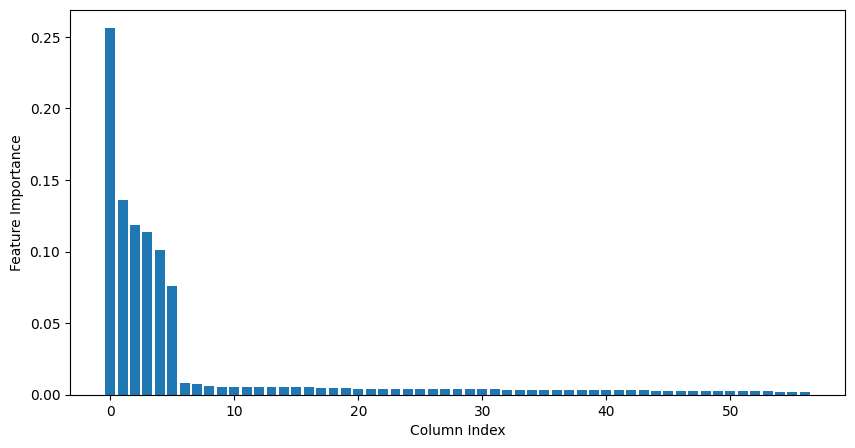

In [55]:
# Importance of each feature
importances = rf_model1.feature_importances_

# Visualize the feature importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.bar(range(X1.shape[1]), importances[indices])
plt.ylabel("Feature Importance")
plt.xlabel("Column Index")
plt.show()

Based on the feature importance, we can remove state feature from our model.

From the above results, we can see that both the precision score and recall score for SVM is much lower than the Random Forest Classifier. Although, the area under the roc curve (auc)  is the same for both models which is 0.8.

Based on the two predictive models, the second one we created with Random Forest Classifier would be a better choice. We can also tune this model and improve it by updating the parameter and removing state variable from the feature set for better prediction.

With the existing consumer insights through data, companies can predict customers’ possible needs and issues, define proper strategies and solutions against them, meet their expectations and retain their business. Based on the predictive analysis and modeling, businesses can focus their attention with targeted approach by segmenting and offering them customized solutions.